->Task: Predictive Modeling

->Build a regression model to predict the 
 aggregate rating of a restaurant based on
 available features.
->Split the dataset into training and testing sets
 and evaluate the model's performance using
  appropriate metrics.

->Experiment with different algorithms (e.g.,
 linear regression, decision trees, random
 forest) and compare their performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Dell\AppData\Local\Temp\ipykernel_10964\2259232837.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv(r'c:\Users\Dell\Downloads\Dataset .csv')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

In [5]:
df['Restaurant Name']=df['Restaurant Name'].replace({"Cafe Coffee Day":0,"Domino's Pizza":1,"Subway":2,"Green Chick Chop":3,"McDonald's":4,"Odeon Social":5,"Johnny Rockets":6,"House of Commons":7,"HotMess":8,"Walter's Coffee Roastery":9})

In [6]:
df['Restaurant Name'].value_counts()

Restaurant Name
0    83
1    79
2    63
3    51
4    48
     ..
5     1
6     1
7     1
8     1
9     1
Name: count, Length: 7446, dtype: int64

In [7]:
x=df[['Restaurant ID','Votes','Price range']]
y=df['Aggregate rating']

In [8]:
x.head()

,Restaurant ID,Votes,Price range
0,6317637,314,3
1,6304287,591,3
2,6300002,270,4
3,6318506,365,4
4,6314302,229,4


In [9]:
y.head()

0    4.8
1    4.5
2    4.4
3    4.9
4    4.8
Name: Aggregate rating, dtype: float64

In [10]:
from sklearn.model_selection import  train_test_split

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.23,random_state=2024)

In [13]:
xtrain

,Restaurant ID,Votes,Price range
4140,18424895,29,1
7122,307986,11,1
2213,18427204,0,1
4581,306338,38,2
6956,18211312,16,1
...,...,...,...
2494,18216876,885,3
2688,18207831,7,1
2656,18124361,34,1
3578,18261188,106,1


In [14]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [15]:
ypred

array([1.72869543, 3.3558863 , 3.61273451, ..., 2.4770209 , 3.00533025,
       2.5062687 ])

In [16]:
lr.score(xtrain,ytrain)

0.2845248644448021

In [17]:
lr.score(xtest,ytest)

0.3048135949740127

In [18]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

In [19]:
r2score=r2_score(ytest,ypred)

In [20]:
r2_score

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>

In [21]:
mse=mean_squared_error(ytest,ypred)

In [22]:
mse

1.647989189648649

In [23]:
rmse=np.sqrt(mse)

In [24]:
rmse

1.2837403123874582

In [25]:
mae=mean_absolute_error(ytest,ypred)

In [26]:
mae

1.0688196266382002

In [27]:
print('Mean Absolute error of model is ',mae)
print('Root of mean square error of madel is ',rmse)
print('Mean Square error of model is ',mse)

Mean Absolute error of model is  1.0688196266382002
Root of mean square error of madel is  1.2837403123874582
Mean Square error of model is  1.647989189648649


By using different machine learning algorithm

In [36]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [37]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [38]:
df1=pd.DataFrame(df)

In [39]:
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [40]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le=LabelEncoder()
df1['Rating text']=le.fit_transform(df1['Rating text'])
df1['Switch to order menu']=le.fit_transform(df1['Switch to order menu'])
df1['Locality']=le.fit_transform(df1['Locality'])
df1['Locality Verbose']=le.fit_transform(df1['Locality Verbose'])
df1['Is delivering now']=le.fit_transform(df1['Is delivering now'])
df1['Has Online delivery']=le.fit_transform(df1['Has Online delivery'])
df1['Cuisines']=le.fit_transform(df1['Cuisines'])
df1['Address']=le.fit_transform(df1['Address'])
df1['City']=le.fit_transform(df1['City'])
df1['Latitude']=le.fit_transform(df1['Latitude'])
df1['Longitude']=le.fit_transform(df1['Longitude'])
df1['Currency']=le.fit_transform(df1['Currency'])
df1['Rating color']=le.fit_transform(df1['Rating color'])
df1['Has Table booking']=le.fit_transform(df1['Has Table booking'])
df1['Aggregate rating']=le.fit_transform(df1['Aggregate rating'])




In [77]:
df1

,Restaurant ID,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,162,73,8685,171,172,8042,384,920,1100,0,1,0,0,0,3,31,0,1,314
1,6304287,162,73,6055,593,601,8041,382,1111,1200,0,1,0,0,0,3,28,0,1,591
2,6300002,162,75,4684,308,314,8053,388,1671,4000,0,1,0,0,0,4,27,1,5,270
3,6318506,162,75,8690,862,875,8050,391,1126,1500,0,0,0,0,0,4,32,0,1,365
4,6314302,162,75,8689,862,875,8055,390,1122,1500,0,1,0,0,0,4,31,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,140,5926,517,523,634,8419,1813,80,11,0,0,0,0,3,24,1,5,788
9547,5908749,208,140,5962,552,558,643,8418,1824,105,11,0,0,0,0,3,25,1,5,1034
9548,5915807,208,140,5966,554,561,641,8425,1110,170,11,0,0,0,0,4,20,5,2,661
9549,5916112,208,140,5967,554,561,642,8426,1657,120,11,0,0,0,0,4,23,1,5,901


In [58]:
df1=df1.drop('Restaurant Name',axis=1)

In [59]:
df1

,Restaurant ID,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,162,73,8685,171,172,8042,384,920,1100,0,1,0,0,0,3,4.8,0,1,314
1,6304287,162,73,6055,593,601,8041,382,1111,1200,0,1,0,0,0,3,4.5,0,1,591
2,6300002,162,75,4684,308,314,8053,388,1671,4000,0,1,0,0,0,4,4.4,1,5,270
3,6318506,162,75,8690,862,875,8050,391,1126,1500,0,0,0,0,0,4,4.9,0,1,365
4,6314302,162,75,8689,862,875,8055,390,1122,1500,0,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,140,5926,517,523,634,8419,1813,80,11,0,0,0,0,3,4.1,1,5,788
9547,5908749,208,140,5962,552,558,643,8418,1824,105,11,0,0,0,0,3,4.2,1,5,1034
9548,5915807,208,140,5966,554,561,641,8425,1110,170,11,0,0,0,0,4,3.7,5,2,661
9549,5916112,208,140,5967,554,561,642,8426,1657,120,11,0,0,0,0,4,4.0,1,5,901


In [97]:
x1=df1[['Restaurant ID','Votes','Price range']]
y1=df1['Aggregate rating']

In [98]:
x1.head()

,Restaurant ID,Votes,Price range
0,6317637,314,3
1,6304287,591,3
2,6300002,270,4
3,6318506,365,4
4,6314302,229,4


In [99]:
x1.dtypes

Restaurant ID    int64
Votes            int64
Price range      int64
dtype: object

In [100]:
y1.head()

0    31
1    28
2    27
3    32
4    31
Name: Aggregate rating, dtype: int64

In [101]:
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.25,random_state=2024)

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dtc=DecisionTreeClassifier()
dtc.fit(x1train,y1train)
y1pred=dtc.predict(xtest)

In [104]:
dtc.score(x1train,y1train)

1.0

In [105]:
dtc.score(x1test,y1test)

0.3341708542713568

In [126]:
dtc2=DecisionTreeClassifier(max_depth=4)
dtc2.fit(x1train,y1train)
y2pred=dtc.predict(xtest)

In [127]:
dtc2.score(x1train,y1train)

0.3523663269579785

In [128]:
dtc2.score(x1test,y1test)

0.35175879396984927

In [129]:
from sklearn import tree

[Text(0.4375, 0.9, 'x[1] <= 3.5\ngini = 0.919\nsamples = 9551\nvalue = [2148.0, 1.0, 2.0, 7.0, 15.0, 27.0, 47.0, 87.0, 110.0\n191.0, 250.0, 315.0, 381.0, 468.0, 519.0, 522.0, 483.0\n498.0, 480.0, 458.0, 427.0, 400.0, 335.0, 266.0, 274.0\n221.0, 174.0, 144.0, 95.0, 78.0, 42.0, 25.0, 61.0]'),
 Text(0.375, 0.7, 'gini = 0.0\nsamples = 2148\nvalue = [2148, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0]'),
 Text(0.5, 0.7, 'x[1] <= 16.5\ngini = 0.949\nsamples = 7403\nvalue = [0.0, 1.0, 2.0, 7.0, 15.0, 27.0, 47.0, 87.0, 110.0\n191.0, 250.0, 315.0, 381.0, 468.0, 519.0, 522.0, 483.0\n498.0, 480.0, 458.0, 427.0, 400.0, 335.0, 266.0, 274.0\n221.0, 174.0, 144.0, 95.0, 78.0, 42.0, 25.0, 61.0]'),
 Text(0.25, 0.5, 'x[1] <= 6.5\ngini = 0.855\nsamples = 1684\nvalue = [0, 0, 0, 0, 0, 1, 4, 10, 20, 43, 98, 178, 305\n364, 315, 185, 93, 21, 20, 5, 5, 3, 2, 3, 3, 3\n2, 1, 0, 0, 0, 0, 0]'),
 Text(0.125, 0.3, 'x[0] <= 18254831.0\ngini = 0.731\nsamples = 525\nval

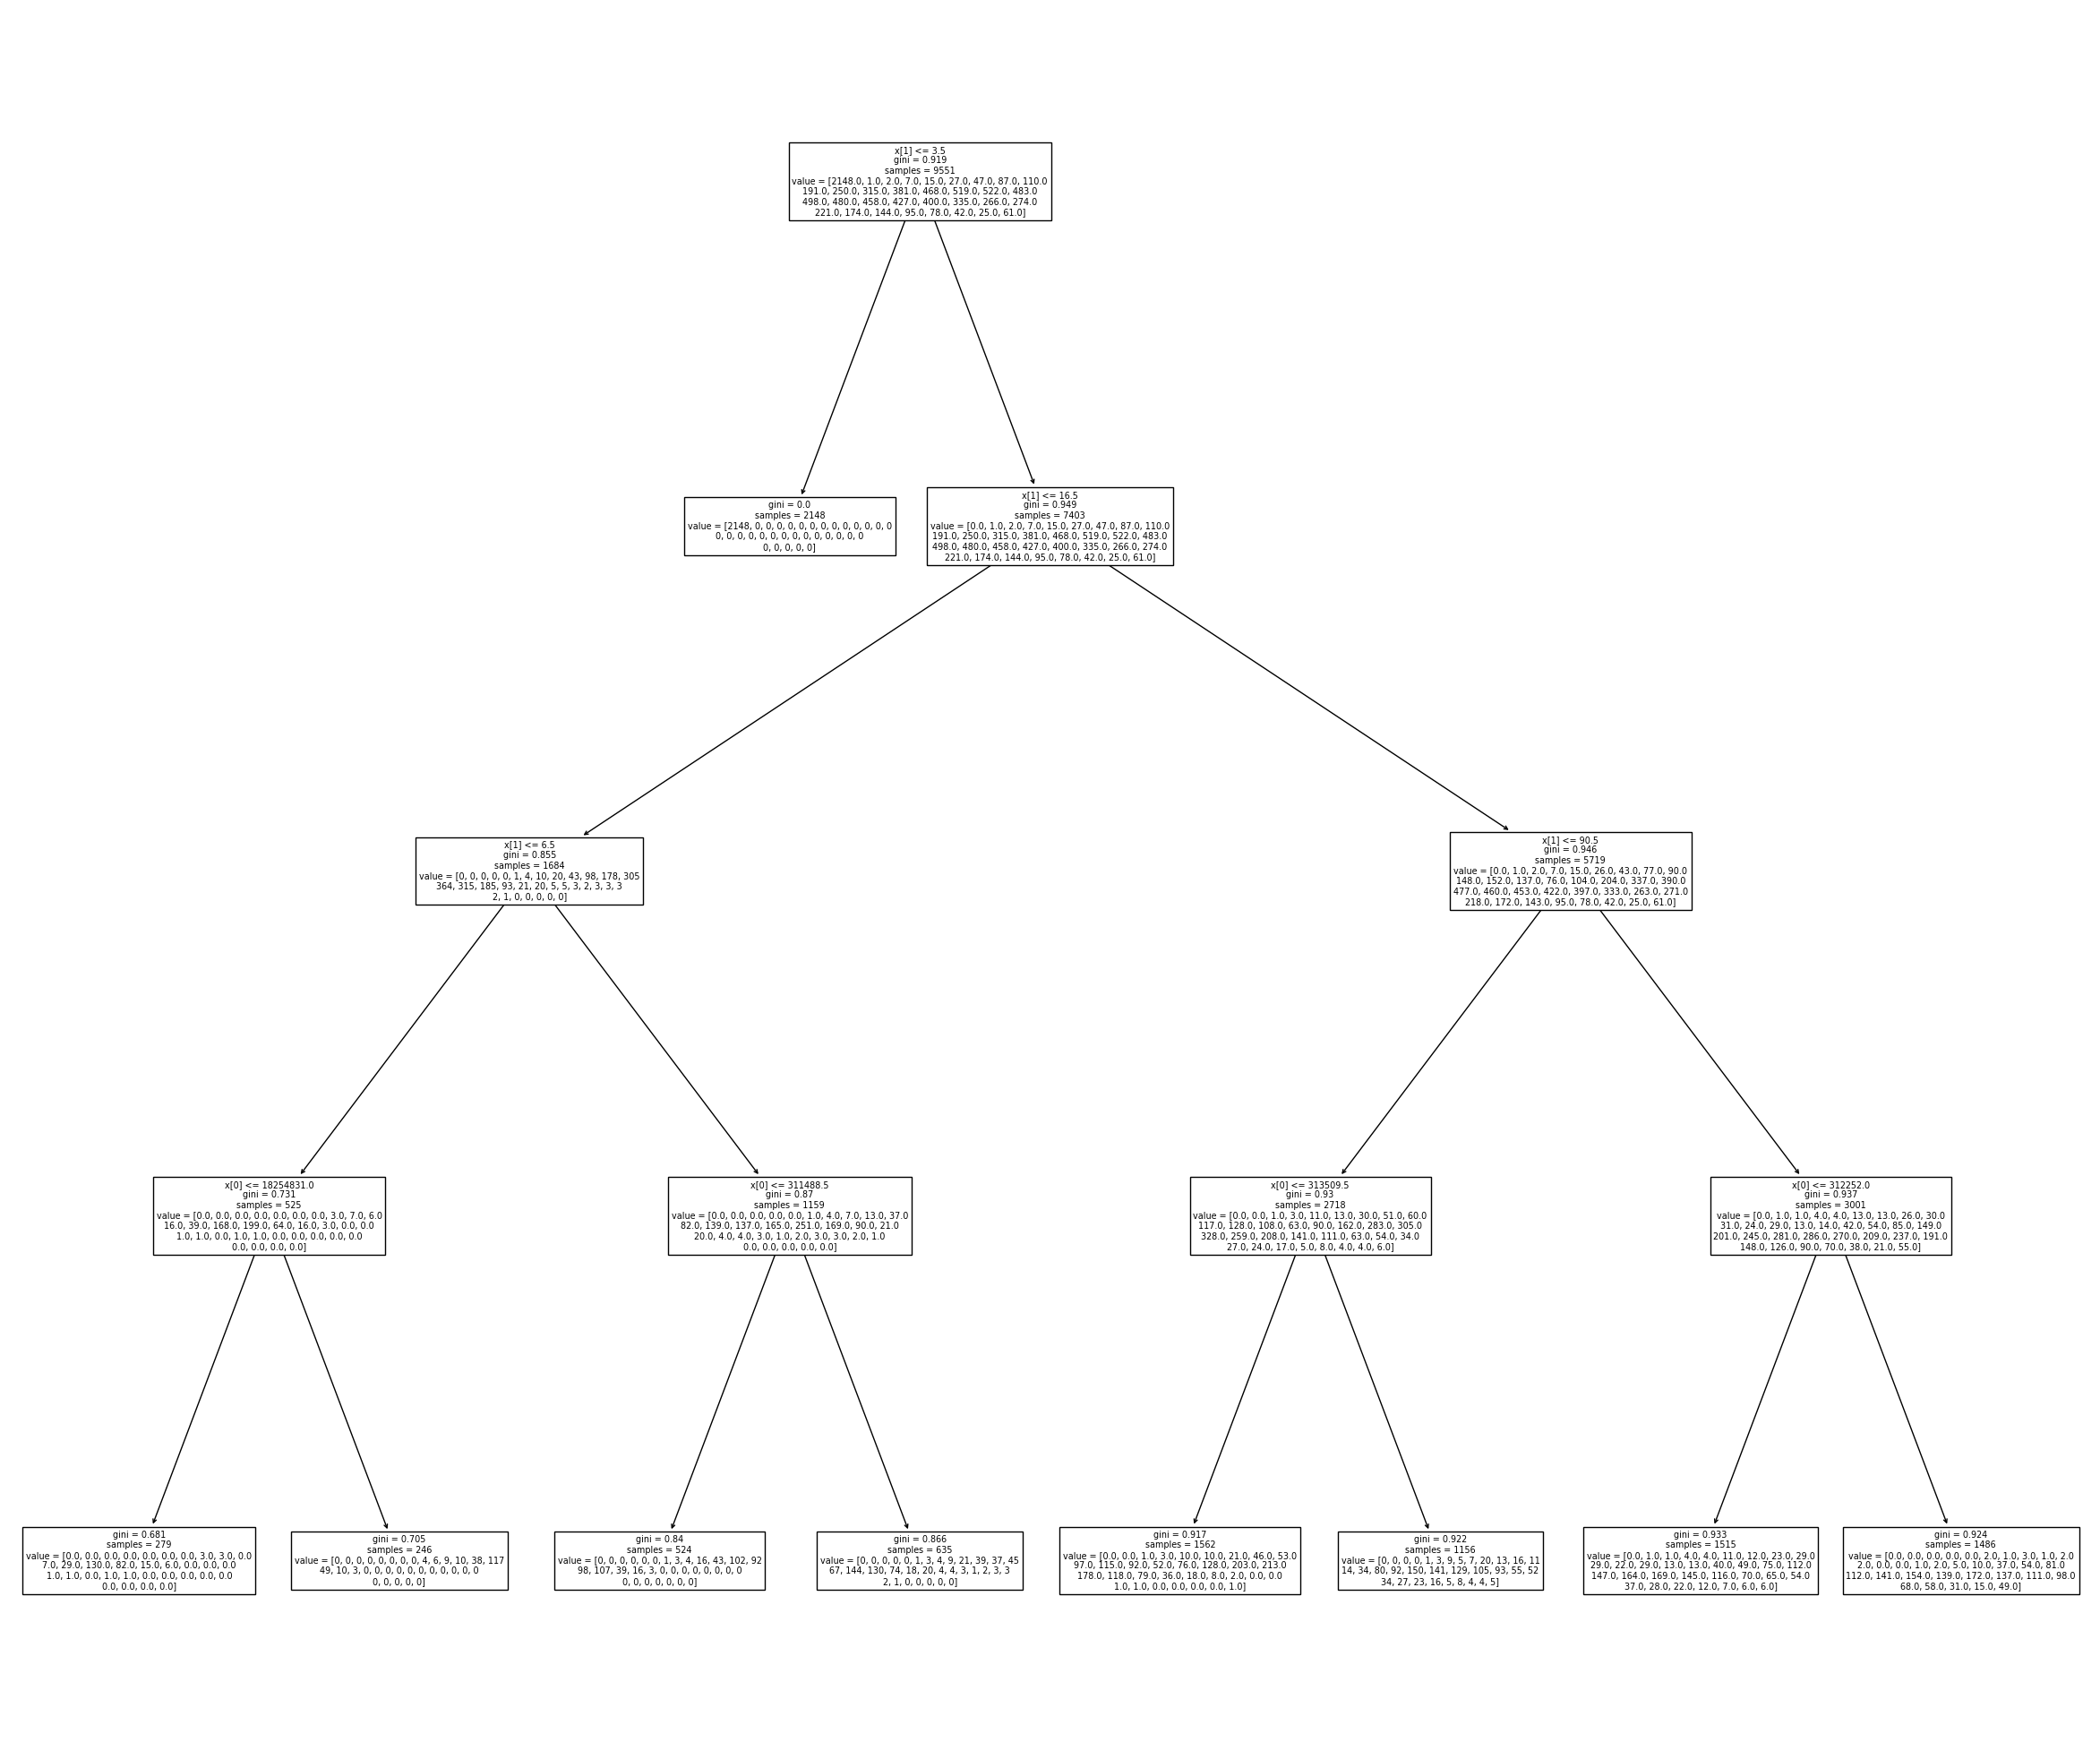

In [130]:
plt.figure(figsize=(30,25))
tree.plot_tree(dtc2.fit(x1,y1))

In [155]:
dtc3=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=20)
dtc3.fit(x1train,y1train)
y3pred=dtc.predict(xtest)

In [156]:
dtc3.score(x1train,y1train)

0.4263576713667458

In [157]:
dtc.score(x1test,y1test)

0.3576214405360134

[Text(0.47374067164179107, 0.9545454545454546, 'x[1] <= 3.5\nentropy = 4.245\nsamples = 9551\nvalue = [2148.0, 1.0, 2.0, 7.0, 15.0, 27.0, 47.0, 87.0, 110.0\n191.0, 250.0, 315.0, 381.0, 468.0, 519.0, 522.0, 483.0\n498.0, 480.0, 458.0, 427.0, 400.0, 335.0, 266.0, 274.0\n221.0, 174.0, 144.0, 95.0, 78.0, 42.0, 25.0, 61.0]'),
 Text(0.47075559701492536, 0.8636363636363636, 'entropy = 0.0\nsamples = 2148\nvalue = [2148, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0]'),
 Text(0.4767257462686567, 0.8636363636363636, 'x[1] <= 39.5\nentropy = 4.484\nsamples = 7403\nvalue = [0.0, 1.0, 2.0, 7.0, 15.0, 27.0, 47.0, 87.0, 110.0\n191.0, 250.0, 315.0, 381.0, 468.0, 519.0, 522.0, 483.0\n498.0, 480.0, 458.0, 427.0, 400.0, 335.0, 266.0, 274.0\n221.0, 174.0, 144.0, 95.0, 78.0, 42.0, 25.0, 61.0]'),
 Text(0.20345149253731343, 0.7727272727272727, 'x[1] <= 10.5\nentropy = 3.737\nsamples = 3054\nvalue = [0.0, 0.0, 0.0, 0.0, 3.0, 2.0, 23.0, 32.0, 46.0\n105.0, 177.0

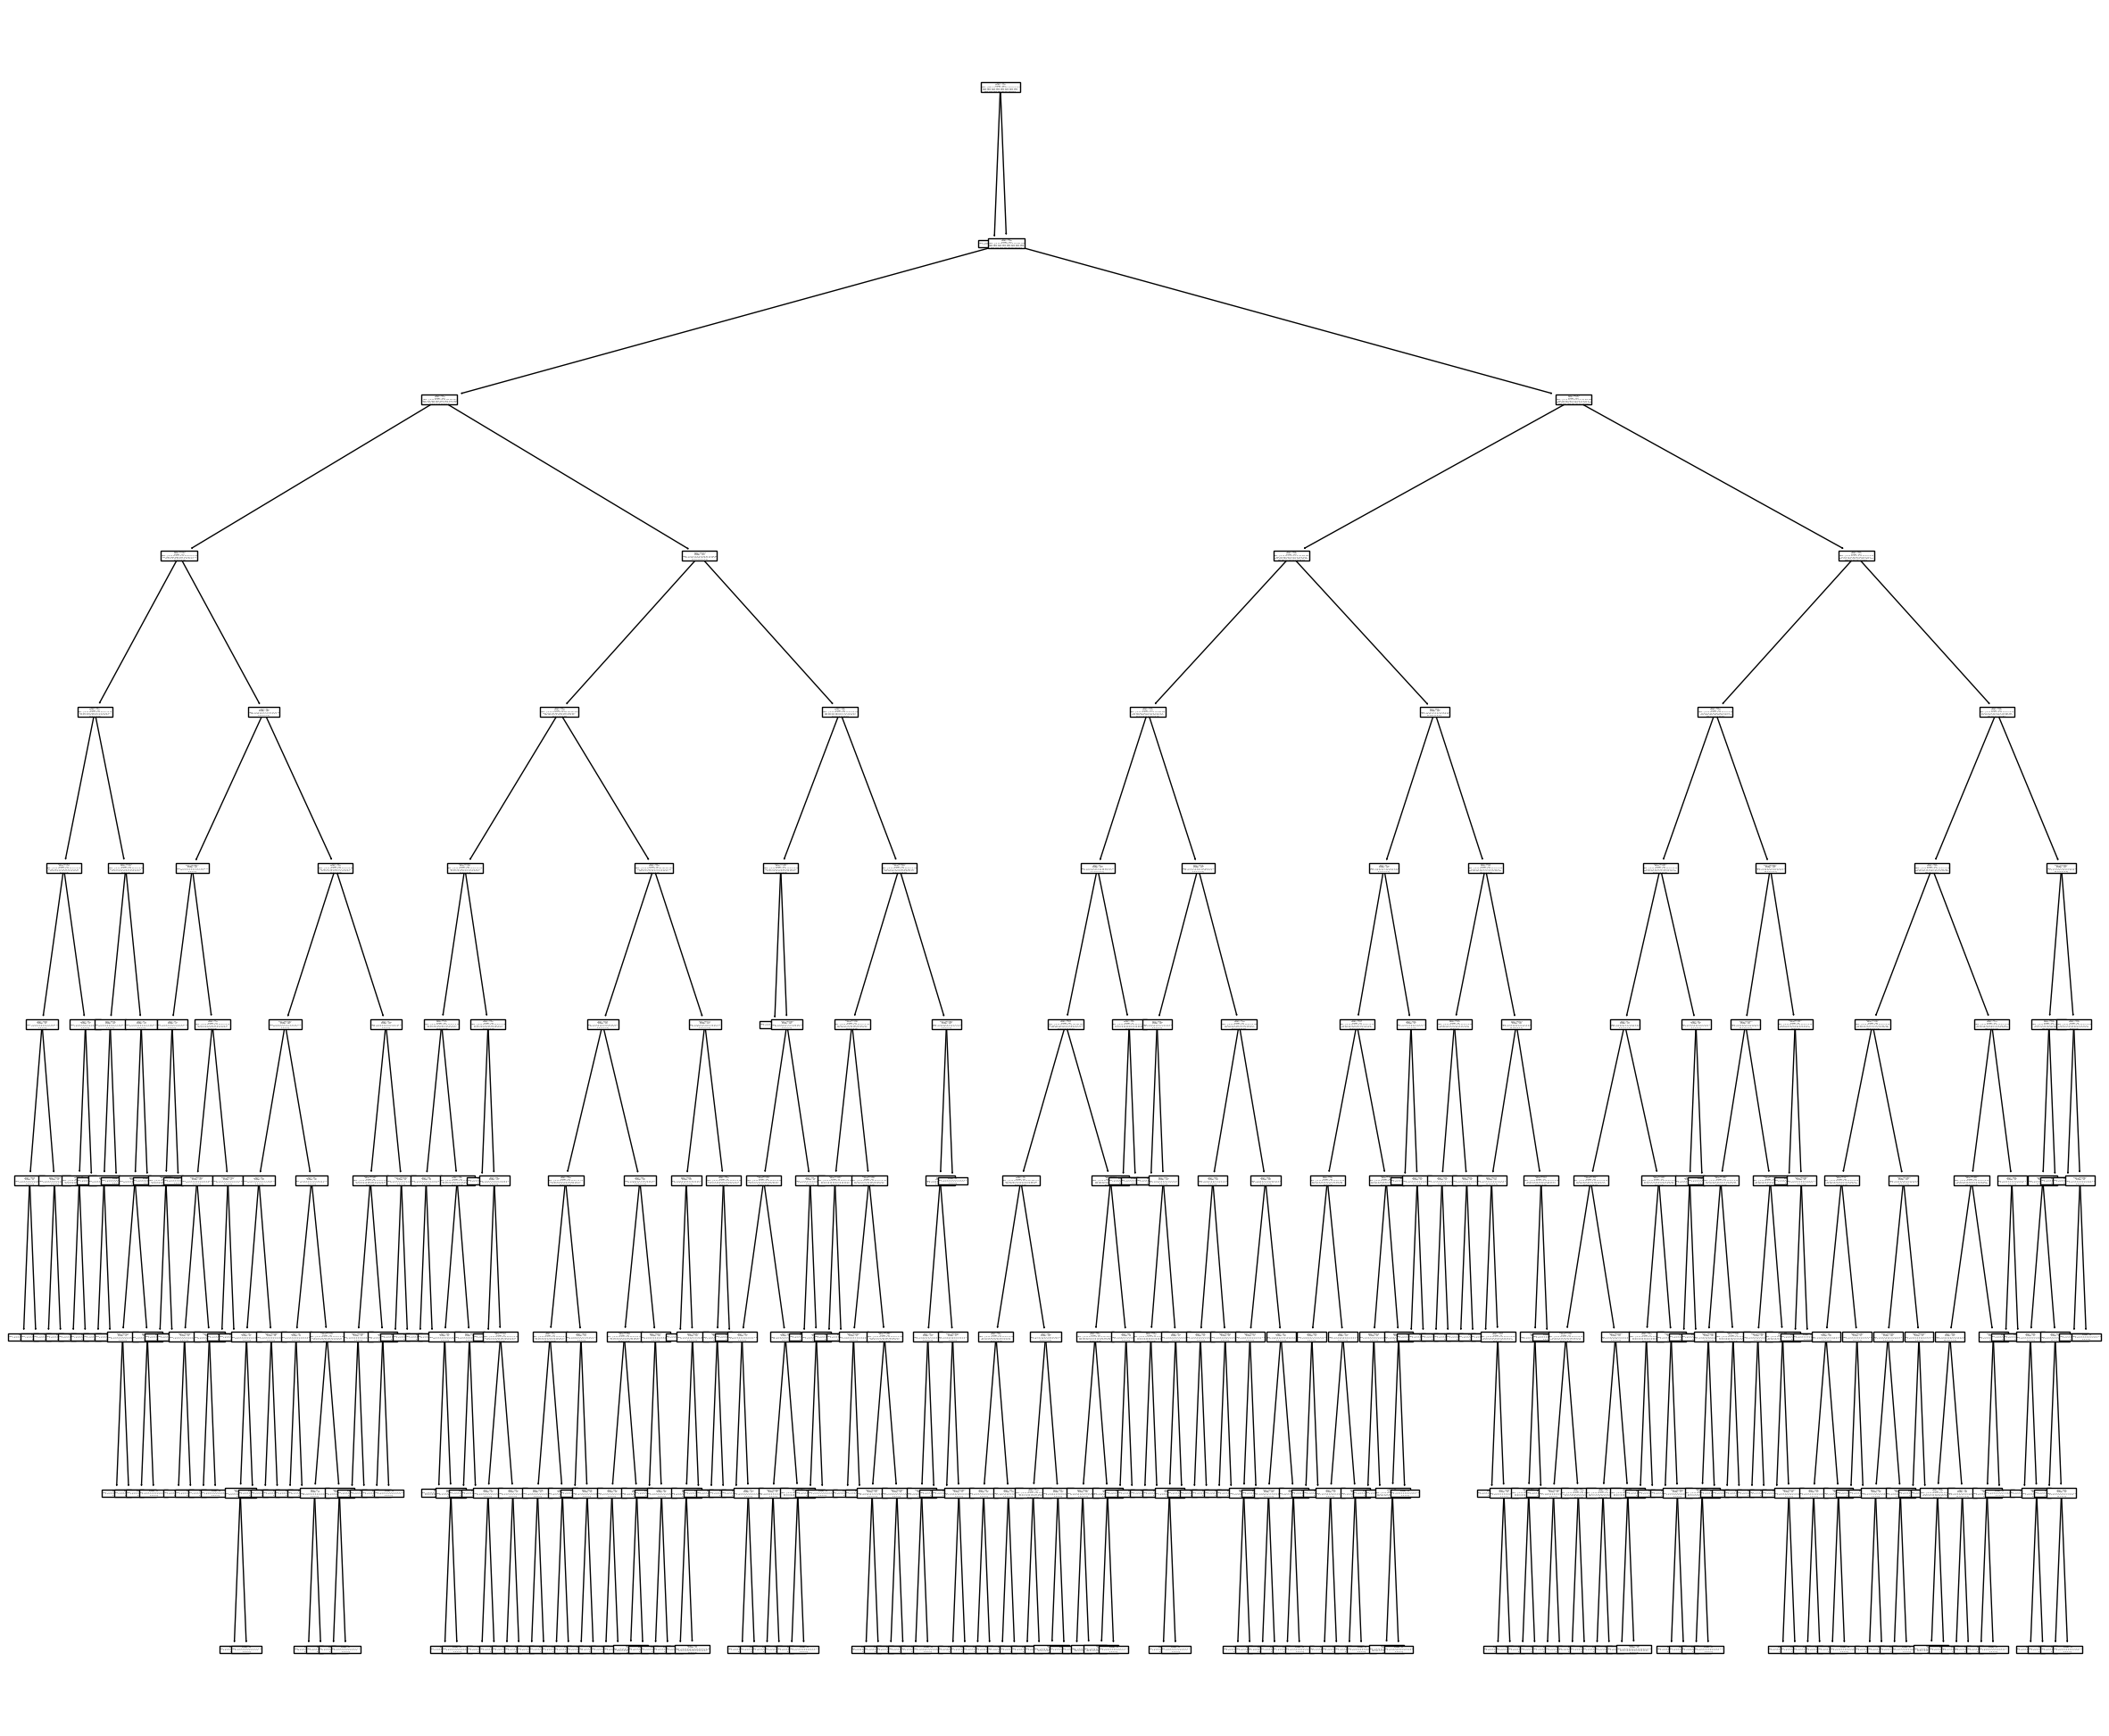

In [158]:
plt.figure(figsize=(30,25))
tree.plot_tree(dtc3.fit(x1,y1))

In [159]:
dtc4=DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=15)
dtc4.fit(x1train,y1train)
y4pred=dtc.predict(xtest)

In [160]:
dtc4.score(x1test,y1test)

0.3538525963149079

In [161]:
dtc4.score(x1train,y1train)

0.38363814044394806

[Text(0.4884072580645161, 0.9375, 'x[1] <= 3.5\nentropy = 4.245\nsamples = 9551\nvalue = [2148.0, 1.0, 2.0, 7.0, 15.0, 27.0, 47.0, 87.0, 110.0\n191.0, 250.0, 315.0, 381.0, 468.0, 519.0, 522.0, 483.0\n498.0, 480.0, 458.0, 427.0, 400.0, 335.0, 266.0, 274.0\n221.0, 174.0, 144.0, 95.0, 78.0, 42.0, 25.0, 61.0]'),
 Text(0.4803427419354839, 0.8125, 'entropy = 0.0\nsamples = 2148\nvalue = [2148, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0]'),
 Text(0.4964717741935484, 0.8125, 'x[1] <= 39.5\nentropy = 4.484\nsamples = 7403\nvalue = [0.0, 1.0, 2.0, 7.0, 15.0, 27.0, 47.0, 87.0, 110.0\n191.0, 250.0, 315.0, 381.0, 468.0, 519.0, 522.0, 483.0\n498.0, 480.0, 458.0, 427.0, 400.0, 335.0, 266.0, 274.0\n221.0, 174.0, 144.0, 95.0, 78.0, 42.0, 25.0, 61.0]'),
 Text(0.25100806451612906, 0.6875, 'x[1] <= 10.5\nentropy = 3.737\nsamples = 3054\nvalue = [0.0, 0.0, 0.0, 0.0, 3.0, 2.0, 23.0, 32.0, 46.0\n105.0, 177.0, 246.0, 342.0, 425.0, 426.0, 372.0, 262.0\n195.0,

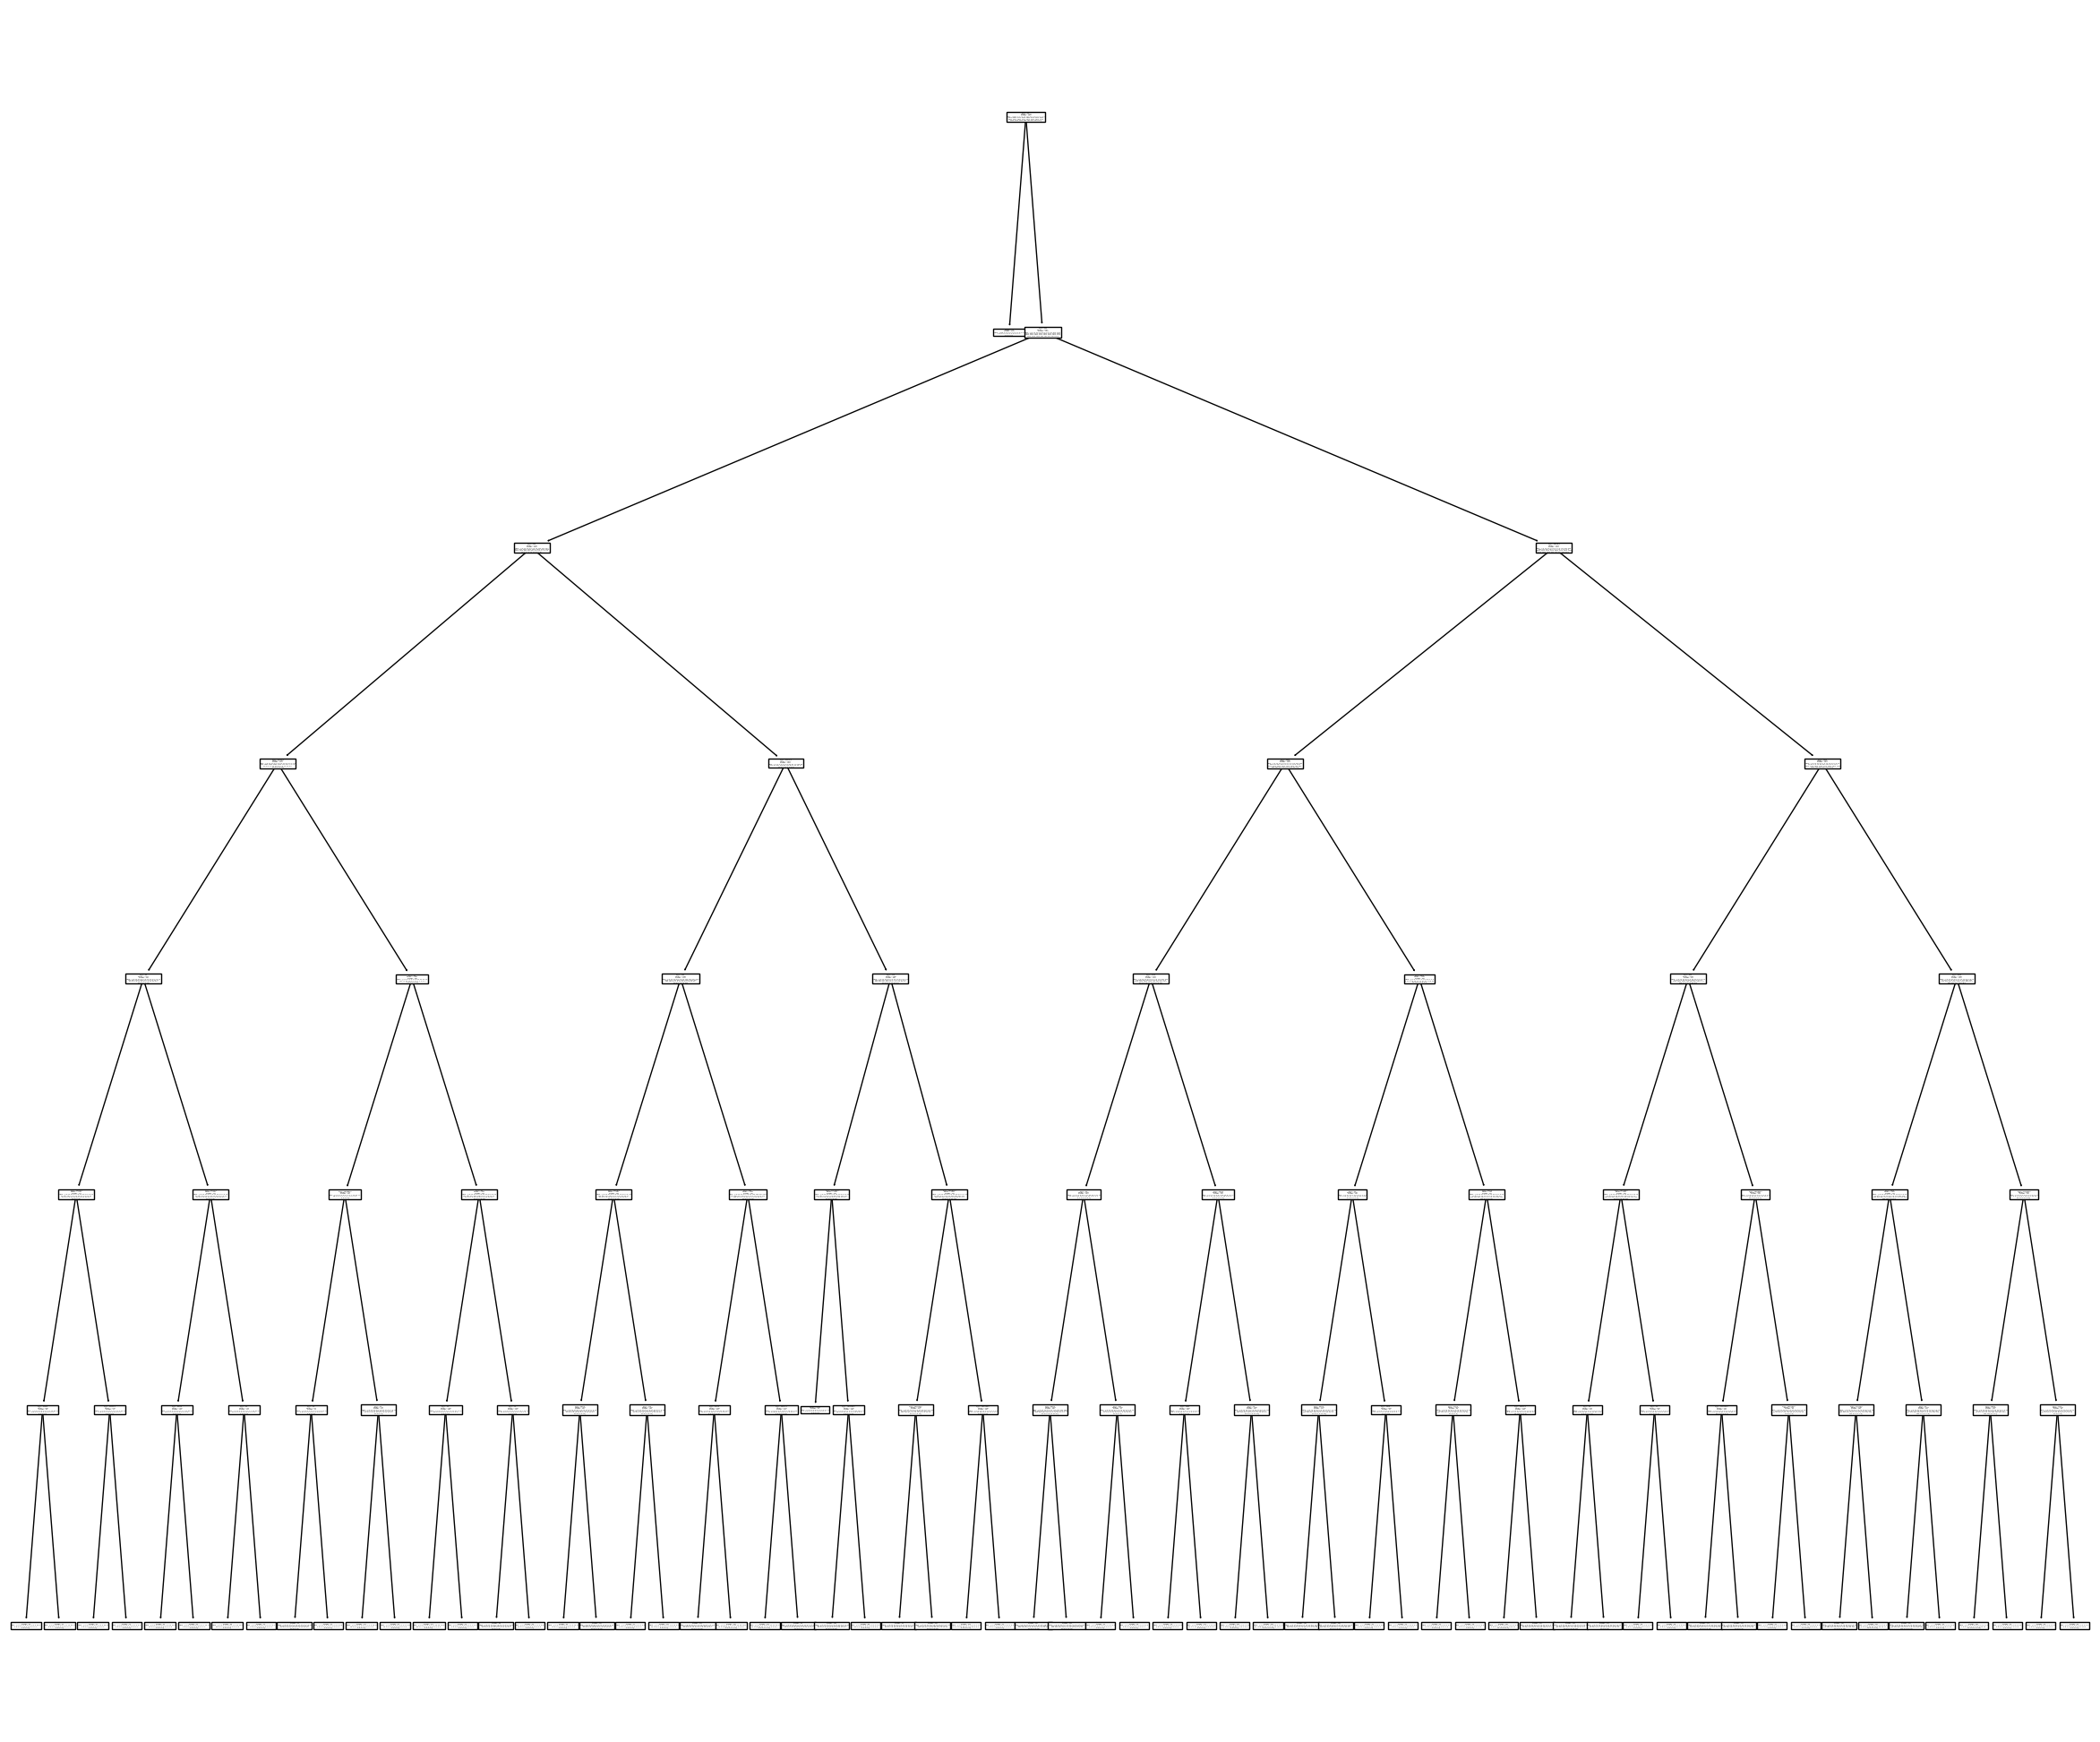

In [162]:
plt.figure(figsize=(30,25))
tree.plot_tree(dtc4.fit(x1,y1))

In [169]:
from sklearn.linear_model import LogisticRegression

In [170]:
lr=LogisticRegression()
lr.fit(x1train,y1train)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [172]:
ypred1=lr.predict(x1test)

In [173]:
lr.score(x1train,y1train)

0.22225324584671227

In [174]:
lr.score(x1test,y1test)

0.23408710217755443

In [175]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,classification_report

In [176]:
con=confusion_matrix(y1test,ypred1)

In [177]:
con

array([[557,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [ 15,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [ 24,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [ 26,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,

In [181]:
accuracy_score(y1test,ypred1)

0.23408710217755443

In [186]:
a=classification_report(y1test,ypred1)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

In [187]:
print(a)

              precision    recall  f1-score   support

           0       0.23      1.00      0.38       557
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        15
           7       0.00      0.00      0.00        24
           8       0.00      0.00      0.00        26
           9       0.00      0.00      0.00        58
          10       0.00      0.00      0.00        64
          11       0.00      0.00      0.00        84
          12       0.00      0.00      0.00       100
          13       0.00      0.00      0.00       123
          14       0.00      0.00      0.00       121
          15       0.00      0.00      0.00       128
          16       0.00      0.00      0.00       112
          17       0.00      0.00      0.00       120
          18       0.00      0.00      0.00       112
          19       0.00      0.00      0.00        93
          20       0.00    

In [190]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
rf=RandomForestClassifier(n_estimators=15000,max_depth=15,min_samples_leaf=25)
rf.fit(x1train,y1train)

RandomForestClassifier(max_depth=15, min_samples_leaf=25, n_estimators=15000)

In [198]:
ypred_rf=rf.predict(x1test)

In [199]:
res_tr=rf.score(x1train,y1train)
print('Random forest score for traiing is ',res_tr)

Random forest score for traiing is  0.4537205081669691


In [200]:
res_ts=rf.score(x1test,y1test)
print('Random Forest score for testing is ',res_ts)

Random Forest score for testing is  0.3710217755443886
